<h2 style="text-align: center;"><strong>Segment 2: Common Tensor Operations</strong></h2>

* Tensor Transposition
* Basic Tensor Arithmetic
* Reduction
* The Dot Product
* Solving Linear Systems

---

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf

## **Tensor Transposition**

##### **Transposition in NumPy**

In [43]:
X = np.array([[25,2],[5,26],[3,7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [44]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

##### **Transposition in PyTorch**

In [45]:
X_pt = torch.tensor([[25,2],[5,26],[3,7]])
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [46]:
X_pt.T

tensor([[25,  5,  3],
        [ 2, 26,  7]])

##### **Transposition in TensorFlow**

In [47]:
X_tf = tf.Variable([[25,2],[5,26],[3,7]])
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]], dtype=int32)>

In [48]:
tf.transpose(X_tf)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[25,  5,  3],
       [ 2, 26,  7]], dtype=int32)>

---

## **Basic Arithmetical Properties**

*Adding or multiplying with scalar applies operation to all elements and tensor shape is retained*

##### **Arithmetic Operations in NumPy**

In [49]:
X*2

array([[50,  4],
       [10, 52],
       [ 6, 14]])

In [50]:
X+2

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [51]:
X*2+2

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [52]:
A = X+2
A + X

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [53]:
A * X

array([[675,   8],
       [ 35, 728],
       [ 15,  63]])

##### **Arithmetic Operations in PyTorch**

In [54]:
X_pt*2+2

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

*Python operators are overloaded; could alternatively use torch.mul() or torch.add()*

In [55]:
torch.add(torch.mul(X_pt, 2), 2)

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [56]:
A_pt = X_pt + 2
A_pt + X_pt

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [57]:
A_pt * X_pt

tensor([[675,   8],
        [ 35, 728],
        [ 15,  63]])

##### **Arithmetic Operations in TensorFlow**

In [58]:
X_tf*2+2

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

*Operators likewise overloaded; could equally use tf.multiply() tf.add()*

In [59]:
tf.add(tf.multiply(X_tf, 2), 2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

In [60]:
A_tf = X_tf + 2
A_tf + X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

In [61]:
A_tf * X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[675,   8],
       [ 35, 728],
       [ 15,  63]], dtype=int32)>

*If two tensors have the same size, operations are often by default applied element-wise. This is **not matrix multiplication**, which we'll cover later, but is rather called the **Hadamard product** or simply the **element-wise product**.*

> The mathematical notation is $A \odot X$

---

## **Reduction**

*Calculating the sum across all elements of a tensor is a common operation.*

**For example:**
* For vector ***x*** of length *n*, we calculate $\sum_{i=1}^{n} x_i$
* For matrix ***X*** with *m* by *n* dimensions, we calculate $\sum_{i=1}^{m} \sum_{j=1}^{n} X_{i,j}$

In [62]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [63]:
X.sum()

np.int64(68)

In [64]:
torch.sum(X_pt)

tensor(68)

In [65]:
tf.reduce_sum(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=68>

**We Can also be done along one specific axis alone**

*Summing over all rows (i.e., along rows)*

In [66]:
X.sum(axis=0)

array([33, 35])

*Summing over all columns (i.e., along rows)*

In [67]:
X.sum(axis=1)

array([27, 31, 10])

In [68]:
torch.sum(X_pt, 0)

tensor([33, 35])

In [69]:
tf.reduce_sum(X_tf, 1)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([27, 31, 10], dtype=int32)>

*Many other operations can be applied with reduction along all or a selection of axes, e.g.:*

* maximum
* minimum
* mean
* product

---

## **The Dot Product**

If we have two vectors (say, **x** and **y**) with the same length *n*, we can calculate the **dot product** between them. This is annotated several different ways, including the following:

* $x \cdot y$
* $x^Ty$
* $\langle x,y \rangle$

Regardless of which notation you use (the first is often preferred), the calculation is the same: we compute products element-wise and then sum them to obtain a scalar value.
> $x \cdot y = \sum_{i=1}^{n} x_i y_i$

The **dot product** is ubiquitous in deep learning: it is performed at every artificial neuron in a deep neural network, which may contain millions—or even far more—of these neurons.

##### **Dot Product in NumPy**

In [70]:
x = np.array([25, 2, 5])
x

array([25,  2,  5])

In [71]:
y = np.array([0, 1, 2])
y

array([0, 1, 2])

In [72]:
25*0 + 2*1 + 5*2

12

In [73]:
np.dot(x, y)

np.int64(12)

##### **Dot Product in PyTorch**

In [74]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [75]:
y_pt = torch.tensor([0, 1, 2])
y_pt

tensor([0, 1, 2])

In [76]:
torch.dot(torch.tensor([25, 2, 5.]), torch.tensor([0, 1, 2.]))

tensor(12.)

*The dot product of PyTorch tensors can also be computed via NumPy after converting them to arrays.*

In [77]:
np.dot(x_pt.numpy(), y_pt.numpy())

np.int64(12)

##### **Dot Product in TensorFlow**

In [78]:
x_tf = tf.Variable([25, 2, 5])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

In [79]:
y_tf = tf.Variable([0, 1, 2])
y_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([0, 1, 2], dtype=int32)>

In [80]:
tf.reduce_sum(tf.multiply(x_tf, y_tf))

<tf.Tensor: shape=(), dtype=int32, numpy=12>

---

## **Solving Linear Systems**

### **Method 1: Substitution**
*A method for solving a system of linear equations in which one variable is expressed in terms of the others and then replaced (substituted) into the remaining equations to find the solution.*

##### **Substitution Method — Worked Example**

**Question**  
*Solve the following system of linear equations using the **Substitution Method**:*

$$
\begin{cases}
y = 3x \\
-5x + 2y = 2
\end{cases}
$$

**Step-by-step solution**

**Step 1** — *Express one variable in terms of the other*  

> The first equation already gives \(y\) in terms of \(x\):

$$
y = 3x
$$

**Step 2** — *Substitute into the second equation*  

> Substitute \(y = 3x\) into the second equation:

$$
-5x + 2(3x) = 2
$$

> Simplify:

$$
-5x + 6x = 2
$$

$$
x = 2
$$

**Step 3** — *Back-substitute to find \(y\)*  

> Use \(y = 3x\) and substitute \(x = 2\):

$$
y = 3(2) = 6
$$

**Final answer**

$$
x = 2, \qquad y = 6
$$

> You can verify by substituting into the second equation: \(-5(2) + 2(6) = -10 + 12 = 2\).

**Plotting the Intersection of Two Linear Equations — Substitution Method**

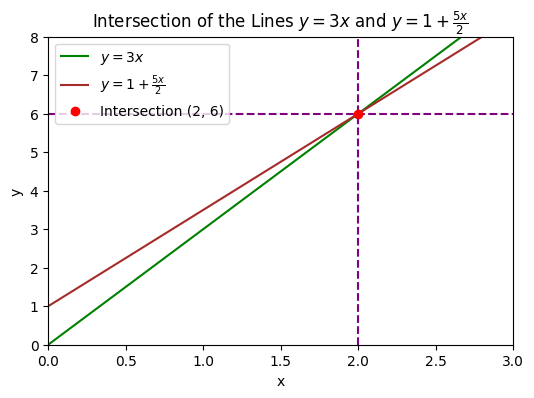

In [81]:
x1 = np.linspace(-10, 10, 1000)
y1 = 3 * x1                
y2 = 1 + (5 * x1) / 2     

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title('Intersection of the Lines $y = 3x$ and $y = 1 + \\frac{5x}{2}$', fontsize=12)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim([0, 3])
ax.set_ylim([0, 8])

ax.plot(x1, y1, color='green', label='$y = 3x$')
ax.plot(x1, y2, color='brown', label='$y = 1 + \\frac{5x}{2}$')

ax.axvline(x=2, color='purple', linestyle='--')
ax.axhline(y=6, color='purple', linestyle='--')
ax.plot(2, 6, 'ro', label='Intersection (2, 6)')

ax.legend()
plt.show()

### **Method 2: Elimination**
*A method for solving a system of linear equations in which one variable is eliminated by adding or subtracting equations, reducing the system to fewer equations with fewer variables until the solution is found.*

##### **Elimination Method — Worked Example**

**Question**
*Solve the following system of linear equations using the **Elimination Method**:*

$$
\begin{cases}
2x - 3y = 15 \\
4x + 10y = 14
\end{cases}
$$

**Step-by-step solution**

**Step 1** — *Write the system*

> Start with the given equations:

$$
2x - 3y = 15
$$

$$
4x + 10y = 14
$$

**Step 2** — *Make coefficients equal*

> Choose to eliminate \(x\). Multiply the first equation by \(2\) so both equations have \(4x\):

$$
2(2x - 3y) = 2(15)
$$

> which gives

$$
4x - 6y = 30
$$

> Now the system is

$$
\begin{cases}
4x - 6y = 30 \\
4x + 10y = 14
\end{cases}
$$

**Step 3** — *Subtract the equations*

> Subtract the second equation from the first (or subtract the first from the second — either works as long as signs are handled consistently):

$$
(4x - 6y) - (4x + 10y) = 30 - 14
$$

> Simplify:

$$
4x - 6y - 4x - 10y = 16
$$

$$
-16y = 16
$$

**Step 4** — *Solve for \(y\)*

$$
y = \frac{16}{-16} = -1
$$

**Step 5** — *Back-substitute to find \(x\)*

> Use \(2x - 3y = 15\) and substitute \(y = -1\):

$$
2x - 3(-1) = 15
$$

$$
2x + 3 = 15
$$

$$
2x = 12
$$

$$
x = 6
$$

**Final answer**

$$
x = 6,\qquad y = -1
$$

> You can verify by substituting into the second equation: \(4(6) + 10(-1) = 24 - 10 = 14\).

**Plotting the Intersection of Two Linear Equations — Elimination Method**

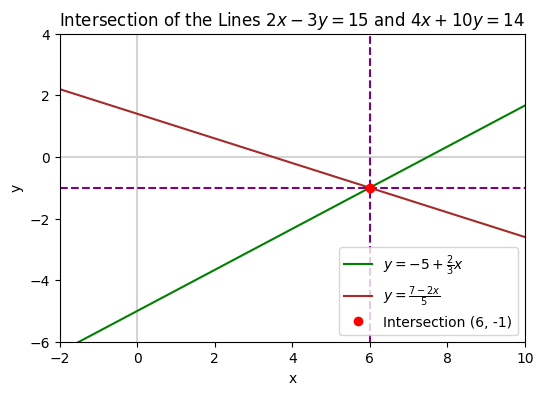

In [82]:
x1 = np.linspace(-2, 10, 1000)
y3 = -5 + (2/3)*x1   
y4 = (7 - 2*x1)/5       

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title('Intersection of the Lines $2x - 3y = 15$ and $4x + 10y = 14$', fontsize=12)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 10])
ax.set_ylim([-6, 4])

ax.plot(x1, y3, color='green', label='$y = -5 + \\frac{2}{3}x$')
ax.plot(x1, y4, color='brown', label='$y = \\frac{7 - 2x}{5}$')

ax.axvline(x=6, color='purple', linestyle='--')
ax.axhline(y=-1, color='purple', linestyle='--')
ax.plot(6, -1, 'ro', label='Intersection (6, -1)')

ax.legend()
plt.show()

---